# Building A Model For Multi-Class Classification
A simple Logistic Regression cannot be used to for multi-class classification. A simple Logistic Regression is equivalent to single-neuron model and can only be used to classify 2 classes. In order to implement Logistic Regression for multi-class classification multiple Logistic Regression models will have to be built (OvR).

Therefore, if there are 3 classes, then 3 models will have to be trained.

<img src = "../artifacts/neural_networks_11.png" alt = "drawing" width = "500"/>

### Can the above be accomplished using a single model?
In multi-class classification,
- The probability of a given data point belonging to either one of the classes (A, B or C) is calculated.
- The data point would be classified into the class for which the probability value was the highest.

An intuition that the output layer should have 3 outputs (one for each class) can be drawn from the above.

Therefore, the Neural Network looks as follows,

<img src = "../artifacts/neural_networks_12.png" alt = "drawing" width = "500"/>

Observations,
- The number of outputs are the same.
- The number of connections are the same.

The difference,
- Computation happens together.

So, instead of a weight vector, the weight matrix is multiplied with data matrix.

A model built by using multiple neurons is called a Neural Network (NN).

# Notations In Neural Networks
### Inputs
Consider that there are 2 features, $x_1$ and $x_2$ and $m$ data points. This is represeted as a matrix where each row is a data point. It looks as,

$\begin{bmatrix}x_{11} & x_{12} \\x_{21} & x_{i2} \\...  & ...  \\x_{m1} & x_{m2}\end{bmatrix}$

### Neuron
Neuron is represented using $f_i$. 

Where,
- $i$ = neuron number. For example, $f_1$ is representing the first neuron.

### Weights
Weights are defined by the notation $w_{ij}$.

Where,
- $i$ = source neuron
- $j$ = destination neuron

The weight associated with input $x_1$ going to neuron $f_2$ is represented as $w_{12}$. Similarly, other weights are represented as, $w_{11}$, $w_{13}$, $w_{21}$, $w_{22}$, $w_{23}$.

### Bias
Each neuron will have a bias term associated with it. The bias matrix is represented as,

$b = \begin{bmatrix}
b_1 \space b_2 \space b_3
\end{bmatrix}$

### Z value
Z value represents the linear operation, i.e., additive multiplication of inputs with their respective weights.
- $z_1 = w_{11} * x_1 + w_{21} * x_2$.
- $z_2 = w_{12} * x_1 + w_{22} * x_2$.
- $z_3 = w_{13} * x_1 + w_{23} * x_2$.

### Output
Each neuron will apply its activation function on the x values to the outputs: $a_1'$, $a_2'$, $a_3'$.

<img src = "../artifacts/neural_networks_13.png" alt = "drawing" width = "500">

### Problem with this formulation
What if the model predict a probability value greater than 0.5 for multiple classes (i.e., $A$, $B$, $C$ = $\begin{bmatrix}1 \space 1 \space 0\end{bmatrix}$ or $A$, $B$, $C$ = $\begin{bmatrix}1 \space 1 \space 1\end{bmatrix}$)?

<img src = "../artifacts/neural_networks_14.png" alt = "drawing" width = "500">

The actual requirement is that, the sum of all output probabilities should be equal to 1.

### How can multiple outputs be 1?
Since the sigmoid activation function is applied to each output and the range of the sigmoid function is, $\sigma \in (0, 1)$. Therefore, multiple probabilitiy values can be greater than 0.5 and hence multiple class labels can be 1.

# Softmax Classifier
Consider 3 outputs, $z_1$, $z_2$ and $z_3$. A function that should map $z_1$, $z_2$ and $z_3$ such that the sum total of the output probabilities is equal to 1 is required.

The softmax function helps in achieving exactly this. The softmax function is mathematicall represented as,

$p_i = \frac{e^{z_i}}{\sum_{i = 0}^{k} e^{z_i}}$.

Here $p_i$ refers to the probability of the data point belonging to class i. There denominator in the equation is the normalization term to make $p_1 + p_2 + p_3 = 1$.

Softmax can be thought of as sigmoid like function for multi-class setting.

### Why not directly use $\frac{{z_i}}{\sum_{i = 0}^{k} {z_i}}$? Why exponentiate $z_i$?
The intuitive reason is that it ensures that values are non-negative and lie only between 0 and 1 (the value of $z_i$ ranges from $-\infty\$ and $\infty$).

Besides this, softmax function has some other desirable properties,
1. It is nicely differentiable $\frac{de^{x}}{dx} = e_x$.
2. The output probabilities can be interpreted as log likelihoods (log odds).

Now consider the following representation,

<img src = "../artifacts/neural_networks_15.png" alt = "drawing" width = "500">

If the normalized z values were instead of exponential,
- The ration of the probability would be 1: 3: 6.
- However, softmax pushes the probability of largest number closer to 1. Hence the term softmax.

Hence, softmax is used as the activation function in NN.

# Training A Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spiral.csv")
df.head()

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0


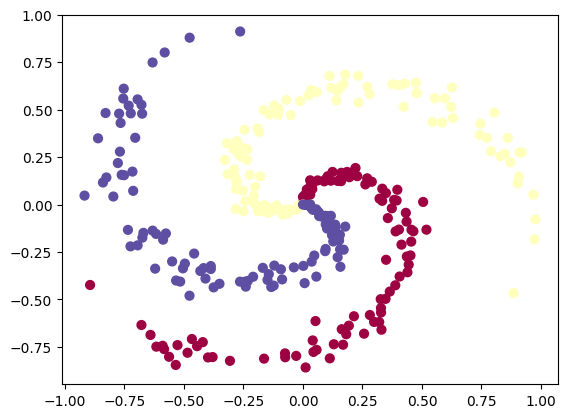

In [3]:
# visualizing the label
plt.scatter(df["x1"], df["x2"], c = df["y"], s = 40, cmap = plt.cm.Spectral)
plt.show()

In [4]:
# classes and number of data points under each class
df["y"].value_counts()

y
0    100
1    100
2    100
Name: count, dtype: int64

In [5]:
# separating features and labels
x = df.drop(columns = ["y"])
y = df["y"]

x.shape, y.shape

((300, 2), (300,))

### How many number of coefficients ($w$) will this model consisting of 3 Logistic Regression or 3 Neurons have?
- There are 2 features, $x_1$ and $x_2$ that will be fed as input to 3 neurons, $d$ = 2.
- Number of Logistic Regression units or Neurons = Number of classes, $n$ = 3. Thus,
    - LR1 has 2 $w$.
    - LR2 has 2 $w$.
    - LR3 has 2 $w$.
- Therefore the model will have a total of 6 coefficients ($w$).

### What should be the shape of $w$?
Before deciding on the shape of $w$, consider the data matrix and the output matrix.
- Data matrix:
    - There are a total of m training examples. Each of which contains 2 features ($d = 2$).
    - The data matrix $x$, has a shape of `mxd`.
- Output matrix:
    - There are 3 values representing 3 outputs, i.e., probabilities of the data point belonging to $A$, $B$ and $C$.
    - Let $n = 3$. Therefore, there are 3 output for the $m$ examples.
    - Therefore, the shape of the output matrix is `mxn`.
- Weight matrix:
    - In order to get the output matrix as a dot product of data and weight matrices, the shape of weight matrix has to be, `dxn`.
    - Therefore, $w' = \begin{bmatrix}w_{11} & w_{12} & w_{13}\\w_{21} & w_{22} & w_{23}\end{bmatrix}_{dxn}$.

<img src = "../artifacts/neural_networks_16.png" alt = "drawing" width = "500">

### How many bias parameters ($b$) will the model have?
- Since there are 3 ($n$ = 3) Neurons and there is 1 bias term per LRU, the model will have $n$ bias terms.
- The bias term is added to the dot product of $x$ and $w$.
- Therefore, the shape of the bias matrix will be `mxn`.

However, the value of bias will not change for different data points. The same bias values can be broadcasted for $m$ examples. Therefore, the shape of the bias matrix becomes `1xn`.

### Vectorized implementation

$\begin{bmatrix}x_{11} & x_{12} \\x_{21} & x_{i2} \\...  & ...  \\x_{m1} & x_{m2}\end{bmatrix}_{mxd} . \begin{bmatrix}w_{11} & w_{12} & w_{13}\\w_{21} & w_{22} & w_{23}\end{bmatrix}_{dxn} + \begin{bmatrix}b_{1} & b_{2} & b_{3} \\b_{1} & b_{2} & b_{3} \\...  & ...  \\b_{1} & b_{2} & b_{3}\end{bmatrix}_{1xn} = \begin{bmatrix}z_{11} & z_{12} & z_{13} \\z_{21} & z_{22} & z_{23} \\...  & ...  \\z_{m1} & x_{m2} & z_{m3}\end{bmatrix}_{mxn}$.

$x.w + b = z$.

$\text{Probability} = A = \text{Softmax}(z)$.

# Categorical Cross Entropy
### What is the loss function used in Logistic Regression?
Log-Loss. It is mathematically represented by, $\text{Log Loss} = (y_i * \log{(y_{pred})}) - ((1 - y_i) * \log{(1 - y_{pred})})$.

### Can Log-Loss be used in for multi-class classification problems.
No, the Log-Loss function is tailored for binary classification problems.

There is a need of a separate loss function for multi-class classification problems.

Consider a data point $x_i$,
- It can belong to one of the $n$ classes.
- Let $P_{ij}$ be the probability of $x_i$ belonging to the class $j$, where, $j \in (1, n)$.

### How will $y_i$ be represented?
The $y_i$'s will be One-Hot Encoded. For example, if $y_i$ = 2 (i.e., belongs to class 2), then only $y_{i2}$ will be represented with a 1, the rest will all be 0 (i.e., [0, 1, 0]).

Cross entropy for i-th data point will be, $CE_i = - \sum_{j = 1}^n y_{ij} \log{(P_{ij})}$.

### What happens to cross entropy when $k$ = 2? (number of class = 2)?
When $k$ = 2, i.e., class 1 and class 2, $CE$ becomes,

$CE_i = -[y_{i1} \log(P_{i1}) + y_{i2} \log(P_{i2})]$.

Where,
- $y_{i1}$, $y_{i2}$ = OHE target label.
- $P_{i1}$, $P_{i2}$ = Probabilities of data points belonging to class 1 and class 2.

Suppose that the data point belongs to class 1. In this case,
- $y_{i1}$ = 1.
- $y_{i2}$ = 0.

Hence,
- $P_{i2}$ can be written as $(1 - P_{i1})$.
- $y_{i2}$ can be written as $(1 - y_{i1})$.

Essentially, the log-loss is exteneded for multi-class classification problems.

Note that, log-loss is also known as binary cross entropy.

To summarize,
- In binary setting,
    - Sigmoid is used to find the probability.
    - Binary cross entropy is used as the loss function.
- In multi-class setting,
    - Softmax is used to find the probability.
    - Cross entropy is used as the loss function.

Simplified explanation,
- Simplifying the calculation: In essence, the cross-entropy loss for a single sample reduces to the negative logarithm of the predicted probability for the correct class.
- Why the simplification works: This simplification occurs because the true label ($y_i$) is 1 for the correct class and 0 for all other classes. When multiplied by the corresponding log probability, the terms for incorrect classes become zero.
- Calculating cross-entropy loss per sample: Let's calculate the cross-entropy loss for each individual sample and denote it as error.
- Computing the full loss: To obtain the overall loss for the entire dataset, we average these individual error values.

# Training Softmax Classifier Using Gradient Descent
### Steps
1. Initialize the parameters, i.e., the matrices, $w$ and $b$.
2. Calculate the output using the hypothesis.
3. Calculate the error, $J$.
4. Repeat the following until $J$ converges,
    - Update, $w_i = w_i - lr * \frac{∂J}{∂w_i}$.
    - Calculate the output using the hypothesis and updated parameters.
    - Calculate the error $J$.

### Step 1: Initialize the parameters

In [6]:
d = x.shape[1] # dimensionality or number of features
n = len(np.unique(y)) # number of classes
m = x.shape[0] # number of samples or data points
d, n, m

(2, 3, 300)

In [7]:
w = 0.01 * np.random.randn(d, n)
b = np.zeros((1, n))

### Step 2: Forward pass or forward propagation
1. Calculate $z$ using $xw$.
2. Apply softmax activation function on $x$,
    - Raise $z$ to exponential $e^z$.
    - Then normalize.

In [8]:
# compute the z values
z = np.dot(x, w) + b
z.shape # this should be mxn, i.e., number of data points x number of classes

(300, 3)

In [9]:
# raise the z values to exponential
exp_z = np.exp(z)
# calculate the probabilities
probs = exp_z/ np.sum(exp_z, axis = 1, keepdims = True)
exp_z.shape, probs.shape

((300, 3), (300, 3))

The following represents the above process.

<img src = "../artifacts/neural_networks_17.png" alt = "drawing" width = "500">

The $s$ in the above figure represents the softmax activation function.

### Step 3: Calculate the loss

In [10]:
y.shape

(300,)

In [11]:
def loss(y, probs):
    m = y.shape[0]
    error = -np.log(probs[range(m), y])
    return np.sum(error)/ m

loss(y, probs)

np.float64(1.096584274635943)

<img src = "../artifacts/neural_networks_18.png" alt = "drawing" width = "500">

# Back Propagation
The following is the Neural Network for the multi-class classification problem,

<img src = "../artifacts/neural_networks_19.png" alt = "drawing" width = "500">

The computational graph looks as follows,

<img src = "../artifacts/neural_networks_20.png" alt = "drawing" width = "500">

### How is the loss decreased in Logistic Regression?
- The partial derivative of $J$ is calculated with respect to each, $w$ and $b$.
- The parameter values of $w$ and $b$ are iteratively updated.

The challenge with the above is that the derivative of $j$ with respect to $w$ and $b$ respectively cannot be calculated directly.

But,
- $J$ is directly dependent on $P$ and hence, $\frac{\partial J}{\partial P_i}$ can be calculated.
- Further, $P_9$ is in-turn dependent on $z$ and $z$ is dependent on $w$ and $b$.

Therefore the chain rule can be used.

<img src = "../artifacts/neural_networks_21.png" alt = "drawing" width = "500">

$\frac{\partial J}{\partial w} = \frac{\partial J}{\partial z} * \frac{\partial z}{\partial w}$.

From the above image, $\frac{\partial J}{\partial z}$ can be calculated as,

$\frac{\partial J}{\partial w} = \frac{\partial J}{\partial P} * \frac{\partial P}{\partial z} * \frac{\partial z}{\partial w}$.

Since $J$ (cost function) is the the final function that has to be optimized, a lot of intermediate calculations like $\frac{\partial J}{\partial <var>}$ will be encountered. In Python, the gradients of $j$ ($\frac{\partial J}{\partial w}$) will be represented as `dw` and the equation $\frac{\partial J}{\partial w} = \frac{\partial J}{\partial z} * \frac{\partial z}{\partial w}$ can be represented as, $dw =  dz * \frac{\partial z}{\partial w}$.

Since the computation is from right to left across the computational graph, this is called as back propagation.

### Calculating gradients using back propagation
The partial derivative of $x$ with respect to $w$ is,
- In LR, since $z = w^T * x$, $\frac{\partial z}{\partial w} = x$.
- To calculate `dz`, $dz = \frac{\partial J}{\partial P} * \frac{\partial P}{\partial z}$.

The result for `dz` has a neat and intuitive solution represented by,

$dz = (P_k - I(i = k))$

Where,
- $P_k$ = Predicted probability of the k-th class.
- $I(i = k)$ = The indicator function, which is 1 if the current class $i$ is the correct class (i.e., $k$) and 0 otherwise.

By subtracting the indicator function from the predicted probability, the error for each class is obtained. A positive value indicates that the model overestimates the probability, whicl a negative value indicated underestimation.

Suppose that `probs = [0.2, 0.3, 0.5]` and the correct class is `0.3`. According to the formula, the gradients would be `dz = [0.2, -0.7, 0.5]`. If the ground truth `y` is saved as one-hot encoded vectors, then the above could be achieved by $P - y$ (`p - y`).

One-hot encoding is a technique used to represent categorical data in a numerical format. In the context of classification problems, it's used to represent the true class labels.
- One-hot encoded label: A vector of the same length as the number of classes, with a 1 at the index corresponding to the true class and 0s elsewhere.

For example, if we have 3 classes and the true class is the second one, the one-hot encoded label would be `[0, 1, 0]`.

By using one-hot encoding, we can simplify the dz calculation to: `dz = p - y`.

Here, `p` is the vector of predicted probabilities and `y` is the one-hot encoded true label. This operation directly calculates the error for each class, which is equivalent to the `dz` calculation using the indicator function.

### Why subtract 1 from the true class probability?
The goal of backpropagation is to adjust the weights and biases in a way that reduces the loss function. In the case of logistic regression, the loss function is typically the cross-entropy loss.

By subtracting 1 from the true class probability, the error between the predicted probability and the true probability is essentially being calculated (which is 1 for the correct class). This error term guides the update of weights and biases in the direction that reduces the overall loss.

In [12]:
# dz = probabilities of class
dz = probs
# subtracting 1 from class where i == j as dz = pi - I
dz[range(m), y] -= 1
# dz = dz/ m

$\frac{\partial z_i}{\partial w_i}$ is something that was calculated in LR as well and it will be equal to x.

To calculate `dw`, `x` has to be multiplied with `dz`.

In [13]:
x.shape

(300, 2)

In [14]:
dz.shape

(300, 3)

In [15]:
# dw = x . dz
dw = np.dot(x.T, dz) # (2, 300) * (300, 3)
dw.shape # (2, 3)

(2, 3)

In [16]:
b.shape # (1, 3)

(1, 3)

It is known that, $z = wx + b$. So,
- $\frac{\partial z}{\partial b} = \frac{\partial (wx + b)}{\partial b} = 1$.
- As $wx$ will be treated as constant when calculating the partial derivative with respect to b.

To calculate $db$, $db = dz * \frac{\partial z}{\partial b} = dz$

Why sum? Since gradient descent (GD) and not stochastic gradient descent (SGD) is being performed,
- Sum of average across all points is taken.
- Also, the average of $dz$ ($dz = \frac{dz}{m}$) is already taken.

Recall the update equation of bias.

<img src = "../artifacts/neural_networks_22.png" alt = "drawing" width = "500">

In [17]:
db = np.sum(dz, axis = 0, keepdims = True)
db.shape

(1, 3)

In [18]:
def backprop(probs, y):
    # dz = pi - I
    dz = probs # dz = pi
    # subtract 1 where i == j i.e., class label matches
    dz[range(m), y] -= 1
    # compute the average
    dz = dz/ m
    dw = np.dot(x.T, dz)
    db = np.sum(dz, axis = 0, keepdims = True)
    return dw, db

Since the computation to calculate the gradients is from right to left it is called back propagation.

In [19]:
# once the gradients are obtained, the parameters can be updated
lr = 0.1
w = w + (-lr * dw)
b = b + (-lr * db)

In [20]:
# create a class with all of the above
max_iters = 500
lr = 1
d = x.shape[1]
n = len(np.unique(y))
m = x.shape[0]
w = 0.01 * np.random.randn(d, n)
b = np.zeros((1, n))
loss_history = []

for i in range(max_iters):
    # evaluate the class probs
    z = np.dot(x, w) + b
    exp_z = np.exp(z)
    probs = exp_z/ np.sum(exp_z, axis = 1, keepdims = True)

    # compute the loss, average cross entropy loss and regularization
    error = -np.log(probs[range(m), y])
    loss = np.sum(error)/ m
    loss_history.append(loss)
    if i % 100 == 0:
        print(f"Iteration = {i}, Loss = {loss}")
    
    # compute the gradient on score
    dz = probs
    dz[range(m), y] -= 1
    dz = dz/ m
    dw = np.dot(x.T, dz)
    db = np.sum(dz, axis = 0, keepdims = True)

    # perform a parameter update using gradient descent
    w = w + (-lr * dw)
    b = b + (-lr * db)

Iteration = 0, Loss = 1.096218880509953
Iteration = 100, Loss = 0.7447029144716067
Iteration = 200, Loss = 0.7405307372321496
Iteration = 300, Loss = 0.7402160476653294
Iteration = 400, Loss = 0.7401859769887181


In [21]:
def predict(x):
    z = np.dot(x, w) + b
    z_e = np.exp(z)
    probs = z_e/np.sum(z_e, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)

print(f"Training Accuracy {np.sum(predict(x) == y)/ m}")

Training Accuracy 0.5266666666666666


The Logistic Regression model has now been adapted to work for multi-class classification problems.

# Plotting The Decision Boundary

(-1.8585153350667682, 1.901484664933235)

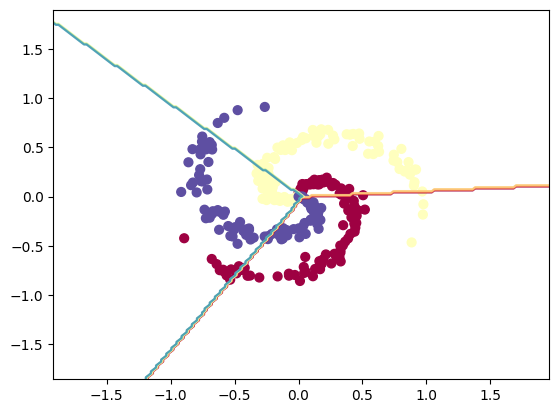

In [22]:
# create a 2D grid
step = 0.02
x_min = x["x1"].min() - 1 # obtain the minimum value from the first column
x_max = x["x1"].max() + 1 # obtain the maximum value from the first column
y_min = x["x2"].min() - 1 # obtain the minimum value from the second column
y_max = x["x2"].max() + 1 # obtain the maximum value from the second column
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# predict all the points in the grid
# concatenates along the second axis
y_pred = predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)

# plot
fig = plt.figure()
plt.contour(xx, yy, y_pred, cmap = plt.cm.Spectral, alpha = 0.8)
plt.scatter(x["x1"], x["x2"], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

It can be observed that the model has learnt 3 decision boundaried.

But since no intermediate layers of neurons have been added to create complex features, it is not expected from the model that it learns complex boundaries.

# Code For Softmax Classifier Wrapped In A Python Code

In [23]:
class SoftmaxClassfier:
    def __init__(self, n_features, n_outputs):
        self.d = n_features
        self.n = n_outputs
        self.W = 0.01 * np.random.randn(self.d,self.n)
        self.b = np.zeros((1,self.n))
        self.loss = []

    def fwdprop(self, X):
        z = np.dot(X, self.W) + self.b
        exp_z = np.exp(z)
        probs = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return probs

    def cce_loss(self, probs, y):
        m = y.shape[0]
        error = -np.log(probs[range(m), y])
        return np.sum(error)/m

    def backprop(self, probs, y):
        m = y.shape[0]
        dz = probs
        dz[range(m),y] -= 1
        dz = dz/m
        dW = np.dot(X.T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        return dW, db

    def fit(self, X, y, lr=0.1, max_iters=50):

        for i in range(max_iters):
            # evaluate the class probs
            probs = self.fwdprop(X)

            # compute the loss: average cross-entropy loss and regularization
            loss = self.cce_loss(probs, y)

            # compute the gradient on score
            dW, db = self.backprop(probs, y)

            # perform a parameter update using gradient descent
            self.W += -lr * dW
            self.b += -lr * db
            self.loss.append(loss)

        self.history = pd.DataFrame({
        'step': list(range(max_iters)),
        'loss': self.loss})

    def plot_loss(self):
        return self.history.plot(x='step', y='loss',xlabel='step', ylabel='loss')

    def predict(self, X):
        probs = self.fwdprop(X)
        return np.argmax(probs, axis = 1)